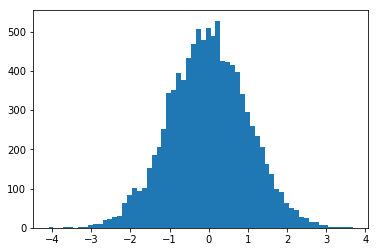

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from pylab import *
import math
from scipy import signal

nn = 50 #number of samples in original sample space

N = 10000 #number of Bootstrap samples you want to create

a = np.random.randn(nn) 

b = np.random.randn(N)

x = np.zeros(N)

plt.hist(b, 'auto')
plt.show()

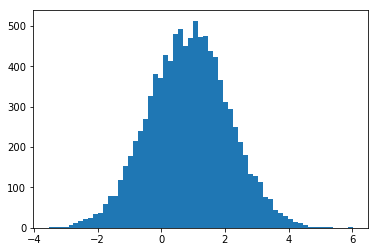

In [2]:
for i in range(N):
    x[i] = np.sqrt(nn)*np.mean(np.random.choice(a,nn))
    
plt.hist(x, 'auto')
plt.show()

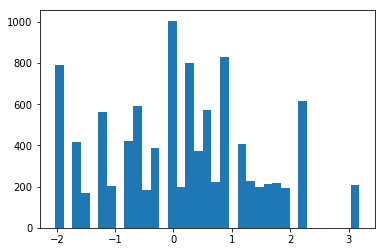

In [3]:
y = np.random.choice(a,N)
plt.hist(y, 'auto')
plt.show()

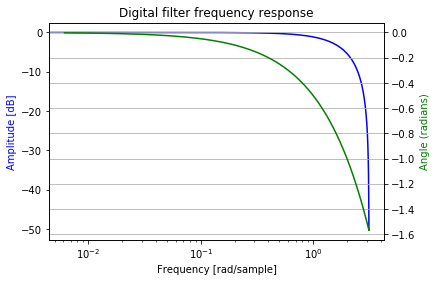

In [26]:
from scipy import signal
b = signal.firwin(2, 0.2, window=('boxcar'))
w, h = signal.freqz(b)

import matplotlib.pyplot as plt
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.xscale('log')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

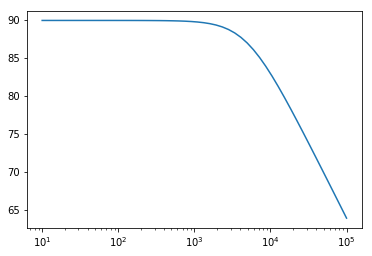

In [27]:
def H(w):
    wc = 10000*math.pi
    return 10000*math.pi / (1.0 + 1j * w / wc)

f = np.logspace(1,5) # frequencies from 10**1 to 10**5

plt.plot(f, 20*np.log10(abs(H(2*math.pi*f)))); xscale('log')
plt.show()

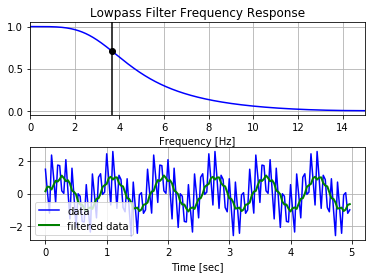

In [13]:
# https://stackoverflow.com/questions/25191620/
#   creating-lowpass-filter-in-scipy-understanding-methods-and-units

import numpy as np
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 2
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0             # seconds
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) \
        + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

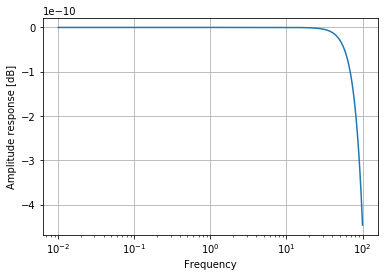

In [22]:
from scipy.signal import freqs, iirfilter
b, a = iirfilter(2, 10000*math.pi, btype='low', analog=True, ftype='butter')
w, h = freqs(b, a, worN=np.logspace(-2, 2, 1000))
import matplotlib.pyplot as plt
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid()
plt.show()

In [ ]:
H = (10000*math.pi)/(s^2 + s*500*math.pi + (10000*math.pi)^2)
